# Test outlier on scores

In [44]:
import imp
import sys
sys.path.append('../lib')
from outlier import *
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from itertools import groupby
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

### Import data

In [2]:
path_images = 'D:\\Users\\S37283\\Documents\\Outlier detection'
header=['idcli_horus', 'topCSPplus', 'revenu', 'gold', 'topstpub', 'top_in', 'top_out', 'prodres_T1', 'prodamo_T1', 'prod_T1', 'top_port', 'top_fixe', 'emailvalide', 'validemail', 'ancclient', 'derprod_arch', 'cli_actif', 'cli_inactif', 'top_homme', 'top_femme', 'habit_prop', 'habit_loc', 'habit_aut', 'csp_actif', 'csp_inact', 'csp_sup', 'csp_ret', 'csp_emp', 'csp_ouv', 'csp_resp', 'sitfam_C', 'sitfam_M', 'sitfam_D', 'sitfam_U', 'sitfam_V', 'sitfam_S', 'sitfam_DS', 'sitfam_DSV', 'sitfam_MU', 'agiopb12m', 'agiovac12m', 'agiorccc12m', 'agiorccl12m', 'agiopb6m', 'agiovac6m', 'agiorccc6m', 'agiorccl6m', 'encpb_m1', 'encvac_m1', 'encrccc_m1', 'encrccl_m1', 'encleas_m1', 'disporccl_m1', 'encpb_m2', 'encvac_m2', 'encrccc_m2', 'encrccl_m2', 'encleas_m2', 'disporccc_m2', 'disporccl_m2', 'encpb_m3', 'encvac_m3', 'encrccc_m3', 'encrccl_m3', 'encleas_m3', 'disporccc_m3', 'disporccl_m3', 'encpb_m4', 'encvac_m4', 'encrccc_m4', 'encrccl_m4', 'encleas_m4', 'disporccc_m4', 'disporccl_m4', 'encpb_m5', 'encvac_m5', 'encrccc_m5', 'encrccl_m5', 'encleas_m5', 'disporccc_m5', 'disporccl_m5', 'encpb_m6', 'encvac_m6', 'encrccc_m6', 'encrccl_m6', 'encleas_m6', 'disporccc_m6', 'disporccl_m6', 'encpb_m7', 'encvac_m7', 'encrccc_m7', 'encrccl_m7', 'encleas_m7', 'disporccc_m7', 'disporccl_m7', 'encpb_m8', 'encvac_m8', 'encrccc_m8', 'encrccl_m8', 'encleas_m8', 'disporccc_m8', 'disporccl_m8', 'encpb_m9', 'encvac_m9', 'encrccc_m9', 'encrccl_m9', 'encleas_m9', 'disporccc_m9', 'disporccl_m9', 'encpb_m10', 'encvac_m10', 'encrccc_m10', 'encrccl_m10', 'encleas_m10', 'disporccc_m10', 'disporccl_m10', 'encpb_m11', 'encvac_m11', 'encrccc_m11', 'encrccl_m11', 'encleas_m11', 'disporccc_m11', 'disporccl_m11', 'encpb_m12', 'encvac_m12', 'encrccc_m12', 'encrccl_m12', 'encleas_m12', 'disporccc_m12', 'disporccl_m12', 'agio12m', 'agio6m', 'agioamo12m', 'agioamo6m', 'agiores12m', 'agiores6m', 'enc_m1', 'encamo_m1', 'encres_m1', 'dispo_m1', 'enc_m2', 'encamo_m2', 'encres_m2', 'dispo_m2', 'enc_m3', 'encamo_m3', 'encres_m3', 'dispo_m3', 'enc_m4', 'encamo_m4', 'encres_m4', 'dispo_m4', 'enc_m5', 'encamo_m5', 'encres_m5', 'dispo_m5', 'enc_m6', 'encamo_m6', 'encres_m6', 'dispo_m6', 'enc_m7', 'encamo_m7', 'encres_m7', 'dispo_m7', 'enc_m8', 'encamo_m8', 'encres_m8', 'dispo_m8', 'enc_m9', 'encamo_m9', 'encres_m9', 'dispo_m9', 'enc_m10', 'encamo_m10', 'encres_m10', 'dispo_m10', 'enc_m11', 'encamo_m11', 'encres_m11', 'dispo_m11', 'enc_m12', 'encamo_m12', 'encres_m12', 'dispo_m12', 'nbmenc12M', 'nbmenc6M', 'nbmencamo12M', 'nbmencamo6M', 'nbmencres12M', 'nbmencres6M', 'nbmdispo12M', 'nbmdispo6M', 'senc12M', 'senc6M', 'sencamo12M', 'sencamo6M', 'sencpb12M', 'sencpb6M', 'sencvac12M', 'sencvac6M', 'sencres12M', 'sencres6M', 'sencrccc12M', 'sencrccc6M', 'sencrccl12M', 'sencrccl6M', 'sdispo12M', 'sdispo6M', 'sdisporccc12M', 'sdisporccc6M', 'sdisporccl12M', 'sdisporccl6M', 'moyenc12M', 'moyencamo12M', 'moyencpb12M', 'moyencvac12M', 'moyencres12M', 'moyencrccc12M', 'moyencrccl12M', 'moydispo12M', 'moydisporccc12M', 'moydisporccl12M', 'moyenc6M', 'moyencamo6M', 'moyencpb6M', 'moyencvac6M', 'moyencres6M', 'moyencrccc6M', 'moyencrccl6M', 'moydispo6M', 'moydisporccc6M', 'moydisporccl6M', 'agiopb_m1', 'agiovac_m1', 'agiorccc_m1', 'agiorccl_m1', 'agiopb_m2', 'agiovac_m2', 'agiorccc_m2', 'agiorccl_m2', 'agiopb_m3', 'agiovac_m3', 'agiorccc_m3', 'agiorccl_m3', 'agiopb_m4', 'agiovac_m4', 'agiorccc_m4', 'agiorccl_m4', 'agiopb_m5', 'agiovac_m5', 'agiorccc_m5', 'agiorccl_m5', 'agiopb_m6', 'agiovac_m6', 'agiorccc_m6', 'agiorccl_m6', 'agiopb_m7', 'agiovac_m7', 'agiorccc_m7', 'agiorccl_m7', 'agiopb_m8', 'agiovac_m8', 'agiorccc_m8', 'agiorccl_m8', 'agiopb_m9', 'agiovac_m9', 'agiorccc_m9', 'agiorccl_m9', 'agiopb_m10', 'agiovac_m10', 'agiorccc_m10', 'agiorccl_m10', 'agiopb_m11', 'agiovac_m11', 'agiorccc_m11', 'agiorccl_m11', 'agiopb_m12', 'agiovac_m12', 'agiorccc_m12', 'agiorccl_m12', 'agio_m1', 'agioamo_m1', 'agiores_m1', 'agio_m2', 'agioamo_m2', 'agiores_m2', 'agio_m3', 'agioamo_m3', 'agiores_m3', 'agio_m4', 'agioamo_m4', 'agiores_m4', 'agio_m5', 'agioamo_m5', 'agiores_m5', 'agio_m6', 'agioamo_m6', 'agiores_m6', 'agio_m7', 'agioamo_m7', 'agiores_m7', 'agio_m8', 'agioamo_m8', 'agiores_m8', 'agio_m9', 'agioamo_m9', 'agiores_m9', 'agio_m10', 'agioamo_m10', 'agiores_m10', 'agio_m11', 'agioamo_m11', 'agiores_m11', 'agio_m12', 'agioamo_m12', 'agiores_m12', 'nbmagio12M', 'nbmagio6M', 'nbmagioamo12M', 'nbmagioamo6M', 'nbmagiores12M', 'nbmagiores6M', 'minagio6M', 'minagio12M', 'maxagio6M', 'maxagio12M', 'minagiopb6M', 'minagiopb12M', 'maxagiopb6M', 'maxagiopb12M', 'minagiovac6M', 'minagiovac12M', 'maxagiovac6M', 'maxagiovac12M', 'minagiorccc6M', 'minagiorccc12M', 'maxagiorccc6M', 'maxagiorccc12M', 'minagiorccl6M', 'minagiorccl12M', 'maxagiorccl6M', 'maxagiorccl12M', 'minagioamo6M', 'minagioamo12M', 'maxagioamo6M', 'maxagioamo12M', 'minagiores6M', 'minagiores12M', 'maxagiores6M', 'maxagiores12M', 'minenc6M', 'minenc12M', 'maxenc6M', 'maxenc12M', 'minencpb6M', 'minencpb12M', 'maxencpb6M', 'maxencpb12M', 'minencvac6M', 'minencvac12M', 'maxencvac6M', 'maxencvac12M', 'minencrccc6M', 'minencrccc12M', 'maxencrccc6M', 'maxencrccc12M', 'minencrccl6M', 'minencrccl12M', 'maxencrccl6M', 'maxencrccl12M', 'minencamo6M', 'minencamo12M', 'maxencamo6M', 'maxencamo12M', 'minencres6M', 'minencres12M', 'maxencres6M', 'maxencres12M', 'mindispo6M', 'mindispo12M', 'maxdispo6M', 'maxdispo12M', 'maxdisporccc6M', 'maxdisporccc12M', 'mindisporccl6M', 'mindisporccl12M', 'maxdisporccl6M', 'maxdisporccl12M', 'nbpb', 'nbvac', 'nbleas', 'nbrccc', 'nbrccl', 'nbpbarc', 'nbvacarc', 'nbleasarc', 'nbrcccarc', 'nbrcclarc', 'nbpbnarc', 'nbvacnarc', 'nbleasnarc', 'nbrcccnarc', 'nbrcclnarc', 'toppb', 'topvac', 'topleas', 'toprccc', 'toppbarc', 'topvacarc', 'topleasarc', 'toprcccarc', 'toprcclarc', 'toppbnarc', 'topvacnarc', 'topleasnarc', 'toprcccnarc', 'toprcclnarc', 'nbdemat', 'nbdematarc', 'nbdematnarc', 'topdemat', 'topdematarc', 'topdematnarc', 'nbcpthl', 'nbcptl', 'nbamo', 'nbres', 'nbcpthlarc', 'nbcptlarc', 'nbamoarc', 'nbresarc', 'nbcpthlnarc', 'nbcptlnarc', 'nbamonarc', 'nbresnarc', 'topamo', 'topamoarc', 'topresarc', 'topamonarc', 'topresnarc', 'mtpb', 'mtvac', 'mtrccc', 'mtrccl', 'mtpbarc', 'mtvacarc', 'mtrcccarc', 'mtrcclarc', 'mtpbnarc', 'mtvacnarc', 'mtrcccnarc', 'mtrcclnarc', 'mtamo', 'mtres', 'mtamoarc', 'mtresarc', 'mtamonarc', 'mtresnarc', 'mtminpb', 'mtminvac', 'mtminrccc', 'mtminrccl', 'mtmaxpb', 'mtmaxvac', 'mtmaxrccc', 'mtmaxrccl', 'mtminamo', 'mtminres', 'mtmaxamo', 'mtmaxres', 'recderpb', 'recdervac', 'recderrccc', 'recderrccl', 'recdarcpb', 'recdarcvac', 'recdarcrccc', 'recdarcrccl', 'recdercpt', 'recderamo', 'recderres', 'recdarccpt', 'recdarcamo', 'recdarcres', 'nbsoll_m1', 'nbsmail_m1', 'nbsemail_m1', 'nbsas_m1', 'nbsanim_m1', 'nbscross_m1', 'nbsoll_m2', 'nbsmail_m2', 'nbsemail_m2', 'nbsas_m2', 'nbsanim_m2', 'nbscross_m2', 'nbsoll_m3', 'nbsmail_m3', 'nbsemail_m3', 'nbsas_m3', 'nbsanim_m3', 'nbscross_m3', 'nbsoll_m4', 'nbsmail_m4', 'nbsemail_m4', 'nbsas_m4', 'nbsanim_m4', 'nbscross_m4', 'nbsoll_m5', 'nbsmail_m5', 'nbsemail_m5', 'nbsas_m5', 'nbsanim_m5', 'nbscross_m5', 'nbsoll_m6', 'nbsmail_m6', 'nbsemail_m6', 'nbsas_m6', 'nbsanim_m6', 'nbscross_m6', 'nbsoll_m7', 'nbsmail_m7', 'nbsemail_m7', 'nbsas_m7', 'nbsanim_m7', 'nbscross_m7', 'nbsoll_m8', 'nbsmail_m8', 'nbsemail_m8', 'nbsas_m8', 'nbsanim_m8', 'nbscross_m8', 'nbsoll_m9', 'nbsmail_m9', 'nbsemail_m9', 'nbsas_m9', 'nbsanim_m9', 'nbscross_m9', 'nbsoll_m10', 'nbsmail_m10', 'nbsemail_m10', 'nbsas_m10', 'nbsanim_m10', 'nbscross_m10', 'nbsoll_m11', 'nbsmail_m11', 'nbsemail_m11', 'nbsas_m11', 'nbsanim_m11', 'nbscross_m11', 'nbmsoll12M', 'nbmsoll6M', 'nbmsoll3M', 'nbmsmail12M', 'nbmsmail6M', 'nbmsmail3M', 'nbmsemail12M', 'nbmsemail6M', 'nbmsemail3M', 'nbmssms12M', 'nbmssms6M', 'nbmssms3M', 'nbmsas12M', 'nbmsas6M', 'nbmsas3M', 'nbmsanim12M', 'nbmsanim6M', 'nbmsanim3M', 'nbmscross12M', 'nbmscross6M', 'nbmscross3M', 'nbsoll3M', 'nbsoll6M', 'nbsoll12M', 'nbsanim3M', 'nbsanim6M', 'nbsanim12M', 'nbscross3M', 'nbscross6M', 'nbscross12M', 'nbsmail3M', 'nbsmail6M', 'nbsmail12M', 'nbsemail3M', 'nbsemail6M', 'nbsemail12M', 'nbssms3M', 'nbssms6M', 'nbssms12M', 'nbsas3M', 'nbsas6M', 'nbsas12M', 'maxnbsoll3M', 'maxnbsoll6M', 'maxnbsoll12M', 'minnbsoll3M', 'minnbsoll6M', 'maxnbsanim3M', 'maxnbsanim6M', 'maxnbsanim12M', 'minnbsanim3M', 'minnbsanim6M', 'maxnbscross3M', 'maxnbscross6M', 'maxnbscross12M', 'minnbscross3M', 'minnbscross6M', 'maxnbsmail3M', 'maxnbsmail6M', 'maxnbsmail12M', 'minnbsmail3M', 'minnbsmail6M', 'maxnbsemail3M', 'maxnbsemail6M', 'maxnbsemail12M', 'minnbsemail3M', 'minnbsemail6M', 'nbae_m1', 'nbaeds_m1', 'nbaems_m1', 'nbaefs_m1', 'nbaeam_m1', 'nbaepm_m1', 'nbae_m2', 'nbaeds_m2', 'nbaems_m2', 'nbaefs_m2', 'nbaeam_m2', 'nbaepm_m2', 'nbae_m3', 'nbaeds_m3', 'nbaems_m3', 'nbaefs_m3', 'nbaeam_m3', 'nbaepm_m3', 'nbae_m4', 'nbaeds_m4', 'nbaems_m4', 'nbaefs_m4', 'nbaeam_m4', 'nbaepm_m4', 'nbae_m5', 'nbaeds_m5', 'nbaems_m5', 'nbaefs_m5', 'nbaeam_m5', 'nbaepm_m5', 'nbae_m6', 'nbaeds_m6', 'nbaems_m6', 'nbaefs_m6', 'nbaeam_m6', 'nbaepm_m6', 'nbae_m7', 'nbaeds_m7', 'nbaems_m7', 'nbaefs_m7', 'nbaeam_m7', 'nbaepm_m7', 'nbae_m8', 'nbaeds_m8', 'nbaems_m8', 'nbaefs_m8', 'nbaeam_m8', 'nbaepm_m8', 'nbae_m9', 'nbaeds_m9', 'nbaems_m9', 'nbaefs_m9', 'nbaeam_m9', 'nbaepm_m9', 'nbae_m10', 'nbaeds_m10', 'nbaems_m10', 'nbaefs_m10', 'nbaeam_m10', 'nbaepm_m10', 'nbae_m11', 'nbaeds_m11', 'nbaems_m11', 'nbaefs_m11', 'nbaeam_m11', 'nbaepm_m11', 'nbae_m12', 'nbaeds_m12', 'nbaems_m12', 'nbaefs_m12', 'nbaeam_m12', 'nbaepm_m12', 'nbmae12M', 'nbmae6M', 'nbmae3M', 'nbmaeds12M', 'nbmaeds6M', 'nbmaeds3M', 'nbmaems12M', 'nbmaems6M', 'nbmaems3M', 'nbmaefs12M', 'nbmaefs6M', 'nbmaefs3M', 'nbmaeam12M', 'nbmaeam6M', 'nbmaeam3M', 'nbmaepm12M', 'nbmaepm6M', 'nbmaepm3M', 'nbae3M', 'nbae6M', 'nbae12M', 'maxnbae3M', 'maxnbae6M', 'maxnbae12M', 'nbaeds3M', 'nbaeds6M', 'nbaeds12M', 'maxnbaeds3M', 'maxnbaeds6M', 'maxnbaeds12M', 'nbaems3M', 'nbaems6M', 'nbaems12M', 'maxnbaems3M', 'maxnbaems6M', 'maxnbaems12M', 'nbaefs3M', 'nbaefs6M', 'nbaefs12M', 'maxnbaefs3M', 'maxnbaefs6M', 'maxnbaefs12M', 'nbaeam3M', 'nbaeam6M', 'nbaeam12M', 'maxnbaeam3M', 'maxnbaeam6M', 'maxnbaeam12M', 'nbaepm3M', 'nbaepm6M', 'nbaepm12M', 'maxnbaepm3M', 'maxnbaepm6M', 'maxnbaepm12M', 'topA3', 'topB4', 'topB5', 'topF5', 'topF6', 'topM2', 'prodmagrccl_m1', 'prodtresrccl_m1', 'prodcartrccl_m1', 'prodmagres_m1', 'prodtresres_m1', 'prodcartres_m1', 'prodrccl_m1', 'prodres_m1', 'prodmagrccl_m2', 'prodtresrccc_m2', 'prodtresrccl_m2', 'prodcartrccl_m2', 'prodmagres_m2', 'prodtresres_m2', 'prodcartres_m2', 'prodrccc_m2', 'prodrccl_m2', 'prodres_m2', 'prodmagrccc_m3', 'prodmagrccl_m3', 'prodtresrccc_m3', 'prodtresrccl_m3', 'prodcartrccl_m3', 'prodmagres_m3', 'prodtresres_m3', 'prodcartres_m3', 'prodrccc_m3', 'prodrccl_m3', 'prodres_m3', 'prodmagrccl_m4', 'prodtresrccc_m4', 'prodtresrccl_m4', 'prodcartrccl_m4', 'prodmagres_m4', 'prodtresres_m4', 'prodcartres_m4', 'prodrccc_m4', 'prodrccl_m4', 'prodres_m4', 'prodmagrccl_m5', 'prodtresrccc_m5', 'prodtresrccl_m5', 'prodcartrccl_m5', 'prodmagres_m5', 'prodtresres_m5', 'prodcartres_m5', 'prodrccc_m5', 'prodrccl_m5', 'prodres_m5', 'prodmagrccl_m6', 'prodtresrccc_m6', 'prodtresrccl_m6', 'prodcartrccc_m6', 'prodcartrccl_m6', 'prodmagres_m6', 'prodtresres_m6', 'prodcartres_m6', 'prodrccc_m6', 'prodrccl_m6', 'prodres_m6', 'prodmagrccl_m7', 'prodtresrccc_m7', 'prodtresrccl_m7', 'prodcartrccc_m7', 'prodcartrccl_m7', 'prodmagres_m7', 'prodtresres_m7', 'prodcartres_m7', 'prodrccc_m7', 'prodrccl_m7', 'prodres_m7', 'prodmagrccl_m8', 'prodtresrccc_m8', 'prodtresrccl_m8', 'prodcartrccc_m8', 'prodcartrccl_m8', 'prodmagres_m8', 'prodtresres_m8', 'prodcartres_m8', 'prodrccc_m8', 'prodrccl_m8', 'prodres_m8', 'prodmagrccl_m9', 'prodtresrccc_m9', 'prodtresrccl_m9', 'prodcartrccc_m9', 'prodcartrccl_m9', 'prodmagres_m9', 'prodtresres_m9', 'prodcartres_m9', 'prodrccc_m9', 'prodrccl_m9', 'prodres_m9', 'prodmagrccl_m10', 'prodtresrccc_m10', 'prodtresrccl_m10', 'prodcartrccc_m10', 'prodcartrccl_m10', 'prodmagres_m10', 'prodtresres_m10', 'prodcartres_m10', 'prodrccc_m10', 'prodrccl_m10', 'prodres_m10', 'prodmagrccl_m11', 'prodtresrccc_m11', 'prodtresrccl_m11', 'prodcartrccc_m11', 'prodcartrccl_m11', 'prodmagres_m11', 'prodtresres_m11', 'prodcartres_m11', 'prodrccc_m11', 'prodrccl_m11', 'prodres_m11', 'prodmagrccc_m12', 'prodmagrccl_m12', 'prodtresrccc_m12', 'prodtresrccl_m12', 'prodcartrccc_m12', 'prodcartrccl_m12', 'prodmagres_m12', 'prodtresres_m12', 'prodcartres_m12', 'prodrccc_m12', 'prodrccl_m12', 'prodres_m12', 'nbmpres12M', 'nbmpres6M', 'nbmprccc12M', 'nbmprccc6M', 'nbmprccl12M', 'nbmprccl6M', 'nbmpmagres12M', 'nbmpmagres6M', 'nbmptresres12M', 'nbmptresres6M', 'nbmpcartres12M', 'nbmpcartres6M', 'nbmpmagrccc12M', 'nbmpmagrccc6M', 'nbmptresrccc12M', 'nbmptresrccc6M', 'nbmpcartrccc12M', 'nbmpcartrccc6M', 'nbmpmagrccl12M', 'nbmpmagrccl6M', 'nbmptresrccl12M', 'nbmptresrccl6M', 'nbmpcartrccl12M', 'nbmpcartrccl6M', 'spres12M', 'spres6M', 'sprccc12M', 'sprccc6M', 'sprccl12M', 'sprccl6M', 'spmagres12M', 'spmagres6M', 'sptresres12M', 'sptresres6M', 'spcartres12M', 'spcartres6M', 'spmagrccc12M', 'spmagrccc6M', 'sptresrccc12M', 'sptresrccc6M', 'spcartrccc12M', 'spcartrccc6M', 'spmagrccl12M', 'spmagrccl6M', 'sptresrccl12M', 'sptresrccl6M', 'spcartrccl12M', 'spcartrccl6M', 'minprodres6M', 'minprodres12M', 'maxprodres6M', 'maxprodres12M', 'maxprodrccc6M', 'maxprodrccc12M', 'minprodrccl6M', 'minprodrccl12M', 'maxprodrccl6M', 'maxprodrccl12M', 'minprodmagres6M', 'minprodmagres12M', 'maxprodmagres6M', 'maxprodmagres12M', 'maxprodmagrccc6M', 'maxprodmagrccc12M', 'minprodmagrccl6M', 'minprodmagrccl12M', 'maxprodmagrccl6M', 'maxprodmagrccl12M', 'minprodtresres6M', 'minprodtresres12M', 'maxprodtresres6M', 'maxprodtresres12M', 'maxprodtresrccc6M', 'maxprodtresrccc12M', 'minprodtresrccl6M', 'minprodtresrccl12M', 'maxprodtresrccl6M', 'maxprodtresrccl12M', 'minprodcartres6M', 'minprodcartres12M', 'maxprodcartres6M', 'maxprodcartres12M', 'maxprodcartrccc6M', 'maxprodcartrccc12M', 'minprodcartrccl6M', 'minprodcartrccl12M', 'maxprodcartrccl6M', 'maxprodcartrccl12M', 'actif', 'arch1an', 'arch3an', 'arch5an', 'nbckg', 'ckg_actif', 'ckg_1an', 'ckg_anim', 'ckg_3an', 'ckg_5an', 'nbptps', 'ptps_actif', 'ptps_1an', 'ptps_anim', 'ptps_3an', 'ptps_5an', 'nbfnac', 'fnac_actif', 'fnac_1an', 'fnac_anim', 'fnac_3an', 'fnac_5an', 'nblfnac', 'fnac', 'nbrcem', 'rcem_actif', 'rcem_1an', 'rcem_anim', 'rcem_3an', 'rcem_5an', 'nbCC', 'CC_3an', 'CC_5an', 'a_cfpe', 'a_cfp', 'a_cfe', 'a_cpe', 'a_fpe', 'a_cf', 'a_cp', 'a_ce', 'a_fp', 'a_fe', 'a_pe', 'a_c', 'a_f', 'a_p', 'a_e', 'fin']
path='../dtm_cross201606.csv.gz'
store_cible=pd.HDFStore('../PCA/cible_crossB2B_1.h5')
dfCible=store_cible.select('dfCible')
indices1=np.where(dfCible['fin']==1)[0]

In [3]:
n = 2572345 #number of records in file
s = 200000 #desired sample size
skip = sorted(random.sample(range(n),n-s))

In [4]:
skip2=list(set(range(n)).difference(indices1))
skip3=[x+1 for x in skip2]

In [5]:
df_sample = pd.read_table(path,compression='gzip', sep=';',lineterminator='\n',skiprows=skip)
df_sample2 = pd.read_table(path,compression='gzip', sep=';',lineterminator='\n',skiprows=skip3)
df_sample2.columns=header
df_sample.columns=header

In [6]:
frames= [df_sample,df_sample2]
df= pd.concat(frames)
del df_sample
del df_sample2

In [7]:
df.head()

,idcli_horus,topCSPplus,revenu,gold,topstpub,top_in,top_out,prodres_T1,prodamo_T1,prod_T1,...,a_cp,a_ce,a_fp,a_fe,a_pe,a_c,a_f,a_p,a_e,fin
0,91000083829,0,1360.0,0,0,0,0,118.15,0.0,118.15,...,0,0,0,0,0,0,0,1,0,0
1,91000126580,0,1380.0,0,1,0,0,465.42,0.0,465.42,...,0,0,0,0,0,1,0,0,0,0
2,91000224459,0,4456.0,0,0,0,0,0.00,0.0,0.00,...,0,0,0,0,0,0,0,0,1,0
3,91000226861,0,1500.0,0,0,0,0,0.00,0.0,0.00,...,0,0,0,0,0,0,0,0,1,0
4,91000340825,0,1830.0,0,0,0,0,0.00,0.0,0.00,...,0,0,0,0,0,0,1,0,0,0


In [8]:
df=df.fillna(0)
df=df.drop('idcli_horus',axis=1)

In [9]:
unique,counts=np.unique(df.fin,return_counts=True)
np.asarray((unique, counts)).T

array([[     0, 199861],
       [     1,   1800]], dtype=int64)

In [12]:
#store_cible.append('df201606_sample200000',df)

## Import data 2

In [2]:
store_cible=pd.HDFStore('../PCA/cible_crossB2B_1.h5')

In [3]:
uselessFeatures=list(pd.read_table('./uselessFeatures.csv', sep=',')['name'])

In [4]:
#dg=df.iloc[0:150000]
dg=store_cible.select('df201606_sample200000')
cible=dg.fin

In [5]:
dg=dg.drop(uselessFeatures,axis=1)

In [6]:
dg_drop=dg.drop('fin',axis=1)

In [7]:
dg_drop_minmax=pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(dg_drop),columns=dg_drop.columns)

In [8]:
unique,counts=np.unique(cible,return_counts=True)
np.asarray((unique, counts)).T

array([[     0, 199861],
       [     1,   1800]], dtype=int64)

## Score à battre avec LogisticRegression

In [49]:
np.logspace(-4, 4, 10)

array([  1.00000000e-04,   7.74263683e-04,   5.99484250e-03,
         4.64158883e-02,   3.59381366e-01,   2.78255940e+00,
         2.15443469e+01,   1.66810054e+02,   1.29154967e+03,
         1.00000000e+04])

In [51]:
tuned_parameters = [{'penalty': ['l1','l2'],
        'C':list(np.logspace(-4, 4, 10))}]


clf_log = GridSearchCV(LogisticRegression(max_iter=10000), tuned_parameters, scoring='roc_auc', cv=5,verbose=10)
clf_log.fit(dg_drop_minmax,cible)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] penalty=l1, C=0.0001 ............................................
[CV] ............. penalty=l1, C=0.0001, score=0.500000, total=   1.3s
[CV] penalty=l1, C=0.0001 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ............. penalty=l1, C=0.0001, score=0.500000, total=   1.3s
[CV] penalty=l1, C=0.0001 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV] ............. penalty=l1, C=0.0001, score=0.500000, total=   1.4s
[CV] penalty=l1, C=0.0001 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.5s remaining:    0.0s


[CV] ............. penalty=l1, C=0.0001, score=0.500000, total=   1.3s
[CV] penalty=l1, C=0.0001 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.0s remaining:    0.0s


[CV] ............. penalty=l1, C=0.0001, score=0.500000, total=   1.3s
[CV] penalty=l2, C=0.0001 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.5s remaining:    0.0s


[CV] ............. penalty=l2, C=0.0001, score=0.372399, total=   1.9s
[CV] penalty=l2, C=0.0001 ............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.7s remaining:    0.0s


[CV] ............. penalty=l2, C=0.0001, score=0.328897, total=   1.9s
[CV] penalty=l2, C=0.0001 ............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.8s remaining:    0.0s


[CV] ............. penalty=l2, C=0.0001, score=0.384091, total=   1.8s
[CV] penalty=l2, C=0.0001 ............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   13.8s remaining:    0.0s


[CV] ............. penalty=l2, C=0.0001, score=0.391092, total=   1.9s
[CV] penalty=l2, C=0.0001 ............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   15.9s remaining:    0.0s


[CV] ............. penalty=l2, C=0.0001, score=0.367148, total=   1.9s
[CV] penalty=l1, C=0.000774263682681 .................................
[CV] .. penalty=l1, C=0.000774263682681, score=0.500000, total=   1.4s
[CV] penalty=l1, C=0.000774263682681 .................................
[CV] .. penalty=l1, C=0.000774263682681, score=0.500000, total=   1.4s
[CV] penalty=l1, C=0.000774263682681 .................................
[CV] .. penalty=l1, C=0.000774263682681, score=0.500000, total=   1.6s
[CV] penalty=l1, C=0.000774263682681 .................................
[CV] .. penalty=l1, C=0.000774263682681, score=0.500000, total=   1.5s
[CV] penalty=l1, C=0.000774263682681 .................................
[CV] .. penalty=l1, C=0.000774263682681, score=0.500000, total=   1.6s
[CV] penalty=l2, C=0.000774263682681 .................................
[CV] .. penalty=l2, C=0.000774263682681, score=0.406593, total=   2.4s
[CV] penalty=l2, C=0.000774263682681 .................................
[CV] .

[CV] ...... penalty=l2, C=21.5443469003, score=0.816603, total=  19.7s
[CV] penalty=l2, C=21.5443469003 .....................................
[CV] ...... penalty=l2, C=21.5443469003, score=0.815154, total=  16.2s
[CV] penalty=l2, C=21.5443469003 .....................................
[CV] ...... penalty=l2, C=21.5443469003, score=0.772123, total=  17.0s
[CV] penalty=l1, C=166.81005372 ......................................
[CV] ....... penalty=l1, C=166.81005372, score=0.791063, total= 3.9min
[CV] penalty=l1, C=166.81005372 ......................................
[CV] ....... penalty=l1, C=166.81005372, score=0.829138, total= 3.8min
[CV] penalty=l1, C=166.81005372 ......................................
[CV] ....... penalty=l1, C=166.81005372, score=0.813746, total= 3.7min
[CV] penalty=l1, C=166.81005372 ......................................
[CV] ....... penalty=l1, C=166.81005372, score=0.815429, total= 3.1min
[CV] penalty=l1, C=166.81005372 ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 99.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [0.0001, 0.00077426368268112698, 0.0059948425031894088, 0.046415888336127774, 0.35938136638046259, 2.7825594022071258, 21.544346900318821, 166.81005372000558, 1291.5496650148827, 10000.0], 'penalty': ['l1', 'l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=10)

In [52]:
print('--------------------------')
print("Best parameters set found on development set:")
print('')
print(clf_log.best_params_)
print('')

print("Grid scores on development set:")
print('')
means = clf_log.cv_results_['mean_test_score']
stds = clf_log.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_log.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print('')

--------------------------
Best parameters set found on development set:

{'penalty': 'l2', 'C': 0.35938136638046259}

Grid scores on development set:

0.500 (+/-0.000) for {'penalty': 'l1', 'C': 0.0001}
0.369 (+/-0.043) for {'penalty': 'l2', 'C': 0.0001}
0.500 (+/-0.000) for {'penalty': 'l1', 'C': 0.00077426368268112698}
0.411 (+/-0.052) for {'penalty': 'l2', 'C': 0.00077426368268112698}
0.718 (+/-0.062) for {'penalty': 'l1', 'C': 0.0059948425031894088}
0.716 (+/-0.062) for {'penalty': 'l2', 'C': 0.0059948425031894088}
0.795 (+/-0.060) for {'penalty': 'l1', 'C': 0.046415888336127774}
0.801 (+/-0.043) for {'penalty': 'l2', 'C': 0.046415888336127774}
0.807 (+/-0.042) for {'penalty': 'l1', 'C': 0.35938136638046259}
0.808 (+/-0.040) for {'penalty': 'l2', 'C': 0.35938136638046259}
0.807 (+/-0.040) for {'penalty': 'l1', 'C': 2.7825594022071258}
0.807 (+/-0.038) for {'penalty': 'l2', 'C': 2.7825594022071258}
0.804 (+/-0.043) for {'penalty': 'l1', 'C': 21.544346900318821}
0.806 (+/-0.041) for

In [58]:
best_log=LogisticRegression(**clf_log.best_params_)

## Score à battre avec AdaBoost

In [60]:
tuned_parameters = [{'n_estimators': [50,100,200,300],
        'learning_rate':[1,2]}]


clf_ada = GridSearchCV(AdaBoostClassifier(base_estimator=best_log), tuned_parameters, scoring='roc_auc', cv=5,verbose=10)
clf_ada.fit(dg_drop_minmax,cible)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] n_estimators=50, learning_rate=1 ................................
[CV] . n_estimators=50, learning_rate=1, score=0.571107, total= 1.0min
[CV] n_estimators=50, learning_rate=1 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] . n_estimators=50, learning_rate=1, score=0.566222, total= 1.1min
[CV] n_estimators=50, learning_rate=1 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.3min remaining:    0.0s


[CV] . n_estimators=50, learning_rate=1, score=0.644950, total= 1.1min
[CV] n_estimators=50, learning_rate=1 ................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.5min remaining:    0.0s


[CV] . n_estimators=50, learning_rate=1, score=0.662884, total= 1.2min
[CV] n_estimators=50, learning_rate=1 ................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.8min remaining:    0.0s


[CV] . n_estimators=50, learning_rate=1, score=0.589809, total= 1.1min
[CV] n_estimators=100, learning_rate=1 ...............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.0min remaining:    0.0s


[CV]  n_estimators=100, learning_rate=1, score=0.729734, total= 2.1min
[CV] n_estimators=100, learning_rate=1 ...............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  8.2min remaining:    0.0s


[CV]  n_estimators=100, learning_rate=1, score=0.741534, total= 2.1min
[CV] n_estimators=100, learning_rate=1 ...............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 10.4min remaining:    0.0s


[CV]  n_estimators=100, learning_rate=1, score=0.764112, total= 2.1min
[CV] n_estimators=100, learning_rate=1 ...............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 12.7min remaining:    0.0s


[CV]  n_estimators=100, learning_rate=1, score=0.757565, total= 2.2min
[CV] n_estimators=100, learning_rate=1 ...............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 15.1min remaining:    0.0s


[CV]  n_estimators=100, learning_rate=1, score=0.691430, total= 2.2min
[CV] n_estimators=200, learning_rate=1 ...............................
[CV]  n_estimators=200, learning_rate=1, score=0.790251, total= 3.8min
[CV] n_estimators=200, learning_rate=1 ...............................
[CV]  n_estimators=200, learning_rate=1, score=0.801261, total= 4.0min
[CV] n_estimators=200, learning_rate=1 ...............................
[CV]  n_estimators=200, learning_rate=1, score=0.804389, total= 4.0min
[CV] n_estimators=200, learning_rate=1 ...............................
[CV]  n_estimators=200, learning_rate=1, score=0.792986, total= 4.0min
[CV] n_estimators=200, learning_rate=1 ...............................
[CV]  n_estimators=200, learning_rate=1, score=0.732321, total= 4.1min
[CV] n_estimators=300, learning_rate=1 ...............................
[CV]  n_estimators=300, learning_rate=1, score=0.801975, total= 5.6min
[CV] n_estimators=300, learning_rate=1 ...............................
[CV]  

KeyboardInterrupt: 

In [ ]:
print('--------------------------')
print("Best parameters set found on development set:")
print('')
print(clf_ada.best_params_)
print('')

print("Grid scores on development set:")
print('')
means = clf_ada.cv_results_['mean_test_score']
stds = clf_ada.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_ada.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print('')

## Score à battre avec gradient boosting 

In [9]:
tuned_parameters = [{'loss': ['deviance','exponential'],
        'max_features':[5,10,20],
        'max_depth':[5,10,30],
        'n_estimators':[20,100]}]


clf = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, scoring='roc_auc', cv=5,verbose=10)
clf.fit(dg_drop_minmax,cible)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] n_estimators=20, max_depth=5, max_features=5, loss=deviance .....
[CV]  n_estimators=20, max_depth=5, max_features=5, loss=deviance, score=0.764933, total=   4.9s
[CV] n_estimators=20, max_depth=5, max_features=5, loss=deviance .....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


[CV]  n_estimators=20, max_depth=5, max_features=5, loss=deviance, score=0.828192, total=   5.1s
[CV] n_estimators=20, max_depth=5, max_features=5, loss=deviance .....


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.0s remaining:    0.0s


[CV]  n_estimators=20, max_depth=5, max_features=5, loss=deviance, score=0.839377, total=   5.0s
[CV] n_estimators=20, max_depth=5, max_features=5, loss=deviance .....


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.6s remaining:    0.0s


[CV]  n_estimators=20, max_depth=5, max_features=5, loss=deviance, score=0.842343, total=   5.1s
[CV] n_estimators=20, max_depth=5, max_features=5, loss=deviance .....


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.2s remaining:    0.0s


[CV]  n_estimators=20, max_depth=5, max_features=5, loss=deviance, score=0.770484, total=   5.1s
[CV] n_estimators=100, max_depth=5, max_features=5, loss=deviance ....


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.9s remaining:    0.0s


[CV]  n_estimators=100, max_depth=5, max_features=5, loss=deviance, score=0.783578, total=  14.5s
[CV] n_estimators=100, max_depth=5, max_features=5, loss=deviance ....


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   43.7s remaining:    0.0s


[CV]  n_estimators=100, max_depth=5, max_features=5, loss=deviance, score=0.808390, total=  14.7s
[CV] n_estimators=100, max_depth=5, max_features=5, loss=deviance ....


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   59.8s remaining:    0.0s


[CV]  n_estimators=100, max_depth=5, max_features=5, loss=deviance, score=0.850798, total=  14.8s
[CV] n_estimators=100, max_depth=5, max_features=5, loss=deviance ....


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.3min remaining:    0.0s


[CV]  n_estimators=100, max_depth=5, max_features=5, loss=deviance, score=0.849957, total=  14.6s
[CV] n_estimators=100, max_depth=5, max_features=5, loss=deviance ....


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.5min remaining:    0.0s


[CV]  n_estimators=100, max_depth=5, max_features=5, loss=deviance, score=0.776475, total=  14.9s
[CV] n_estimators=20, max_depth=5, max_features=10, loss=deviance ....
[CV]  n_estimators=20, max_depth=5, max_features=10, loss=deviance, score=0.772092, total=   6.6s
[CV] n_estimators=20, max_depth=5, max_features=10, loss=deviance ....
[CV]  n_estimators=20, max_depth=5, max_features=10, loss=deviance, score=0.830441, total=   6.7s
[CV] n_estimators=20, max_depth=5, max_features=10, loss=deviance ....
[CV]  n_estimators=20, max_depth=5, max_features=10, loss=deviance, score=0.844038, total=   7.0s
[CV] n_estimators=20, max_depth=5, max_features=10, loss=deviance ....
[CV]  n_estimators=20, max_depth=5, max_features=10, loss=deviance, score=0.836890, total=   6.8s
[CV] n_estimators=20, max_depth=5, max_features=10, loss=deviance ....
[CV]  n_estimators=20, max_depth=5, max_features=10, loss=deviance, score=0.771025, total=   6.8s
[CV] n_estimators=100, max_depth=5, max_features=10, loss

[CV]  n_estimators=100, max_depth=10, max_features=20, loss=deviance, score=0.757131, total= 3.2min
[CV] n_estimators=100, max_depth=10, max_features=20, loss=deviance ..
[CV]  n_estimators=100, max_depth=10, max_features=20, loss=deviance, score=0.750114, total= 3.4min
[CV] n_estimators=20, max_depth=30, max_features=5, loss=deviance ....
[CV]  n_estimators=20, max_depth=30, max_features=5, loss=deviance, score=0.802644, total= 1.6min
[CV] n_estimators=20, max_depth=30, max_features=5, loss=deviance ....
[CV]  n_estimators=20, max_depth=30, max_features=5, loss=deviance, score=0.714503, total= 1.6min
[CV] n_estimators=20, max_depth=30, max_features=5, loss=deviance ....
[CV]  n_estimators=20, max_depth=30, max_features=5, loss=deviance, score=0.665829, total= 1.4min
[CV] n_estimators=20, max_depth=30, max_features=5, loss=deviance ....
[CV]  n_estimators=20, max_depth=30, max_features=5, loss=deviance, score=0.713614, total= 1.6min
[CV] n_estimators=20, max_depth=30, max_features=5, l

KeyboardInterrupt: 

In [68]:
print('--------------------------')
print("Best parameters set found on development set:")
print('')
print(clf.best_params_)
print('')

print("Grid scores on development set:")
print('')
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print('')

--------------------------
Best parameters set found on development set:



NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [17]:
gbt=GradientBoostingClassifier(max_depth=30,n_estimators=100,max_features=20)

In [ ]:
cvscore=cross_val_score(gbt, dg_drop_minmax, cible, cv=10,scoring='roc_auc',n_jobs=-1,verbose=10)

In [54]:
np.mean(cvscore)

0.81021660775316007

## Remove outlier using Mahalanobis

In [9]:
outliersMahanalobis=OutlierMahalanobis(support_fraction = 0.95, chi2_percentile = 0.995)

In [10]:
pca=PCA(n_components=2,svd_solver='arpack')

0.083 proportion of outliers at 0.995% chi2 percentile, 
with support fraction 0.95.
Attention : Très forte présomption contre l'hypothèse nulle p_value : 0.0


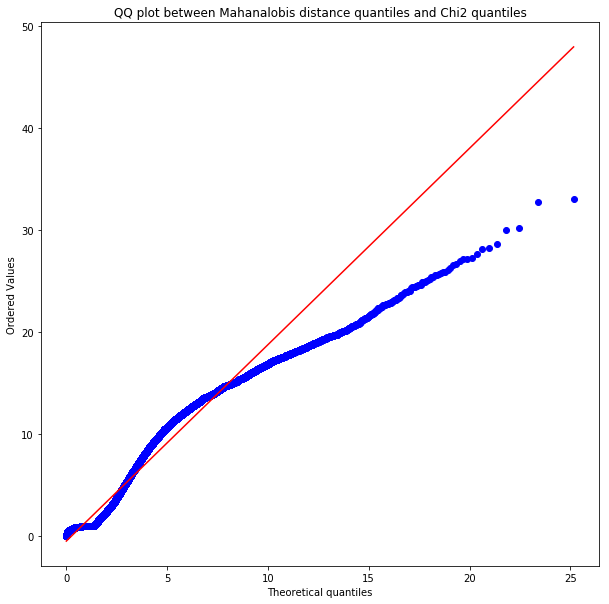

In [11]:
outliersMahanalobis.fit(pca.fit_transform(dg_drop_minmax))

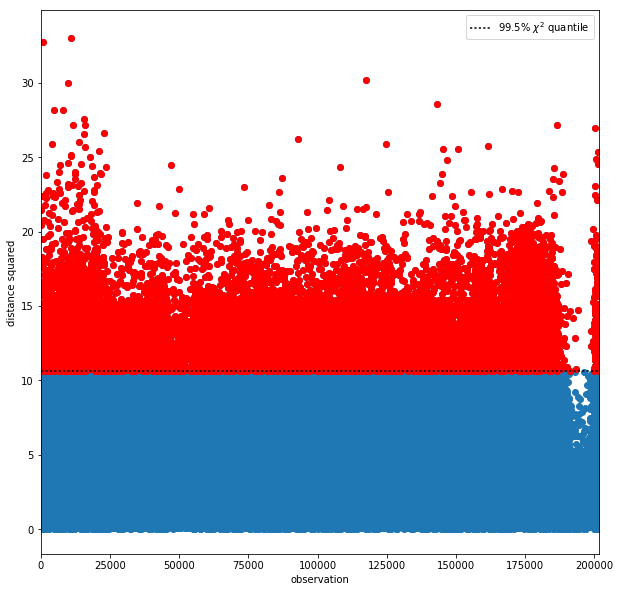

In [12]:
outliersMahanalobis.plot()

In [13]:
weird=outliersMahanalobis.iextreme_values

In [14]:
len(np.where(np.array(weird)==True)[0])/len(weird)

0.08285191484719405

In [15]:
dg_out=dg.drop(weird,axis=0)
cible_out=dg_out.fin
dg_out=dg_out.drop('fin',axis=1)
dg_out=pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(dg_out),columns=dg_out.columns)

In [21]:
cvscore_mh=cross_val_score(gbt, dg_out, cible_out, cv=5,scoring='roc_auc',verbose=10)

[CV]  ................................................................
[CV] ................................. , score=0.777508, total=  15.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.1s remaining:    0.0s


[CV] ................................. , score=0.821626, total=  15.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   30.9s remaining:    0.0s


[CV] ................................. , score=0.847904, total=  15.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   46.4s remaining:    0.0s


[CV] ................................. , score=0.841983, total=  15.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.0min remaining:    0.0s


[CV] ................................. , score=0.776482, total=  15.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished


In [22]:
np.mean(cvscore_mh)

0.81310040651057258

## Remove outlier with Kmeans

In [72]:
#normalIndex=(dg['fin']==1)|(dg['revenu']>0)
normalIndex=(dg['fin']==1)
K=5
kmeans = KMeans(init='k-means++', n_clusters=K, n_init=10,random_state=5)

In [73]:
normal_dataset= np.array(dg.loc[normalIndex])
test_dataset=np.array(dg.loc[~dg.index.isin(normalIndex)])

In [74]:
test_dataset.shape

(201657, 235)

In [75]:
outliersKmeans=OutliersKmeans(normal_dataset,kmeans,parallel=True)

In [76]:
weird=outliersKmeans.is_outlier(test_dataset)

100%|#########################################################################|


In [77]:
len(np.where(np.array(weird)==True)[0])/len(weird)

0.00030745275393365964

In [78]:
pca=PCA(n_components=3,svd_solver='arpack')
pca.fit(dg)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='arpack', tol=0.0, whiten=False)

In [79]:
normal_dataset_proj=pca.transform(normal_dataset)
test_dataset_proj=pca.transform(test_dataset)

In [80]:
outliersKmeans=OutliersKmeans(normal_dataset_proj,kmeans,parallel=True)

In [81]:
weird_proj=outliersKmeans.is_outlier(test_dataset_proj)

100%|#########################################################################|


In [82]:
len(np.where(np.array(weird_proj)==True)[0])/len(weird_proj)

0.00048101479244459653

In [83]:
len(np.where((np.array(weird_proj)==True)&(np.array(weird)==True))[0])

54

In [84]:
dg_out=dg.drop(weird_proj,axis=0)
cible_out=dg_out.fin
dg_out=dg_out.drop('fin',axis=1)
dg_out=pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(dg_out),columns=dg_out.columns)

In [20]:
cvscore_kmeans=cross_val_score(gbt, dg_out, cible_out, cv=10,scoring='roc_auc')

KeyboardInterrupt: 

In [86]:
np.mean(cvscore_kmeans)

0.805035253305314

## Remove outliers with robust PCA

In [8]:
rpca = R_pca(np.array(dg.transpose()))

In [9]:
L, S = rpca.fit(D=np.array(dg.transpose()),max_iter=1000, iter_print=10,tol=1E-3)

iteration: 1, error: 0.6875073052121949
iteration: 10, error: 0.003506348955887657
iteration: 20, error: 0.00258561848191635
iteration: 30, error: 0.002377549412955593
iteration: 40, error: 0.0013853618177933668
iteration: 49, error: 0.0009956537647885279


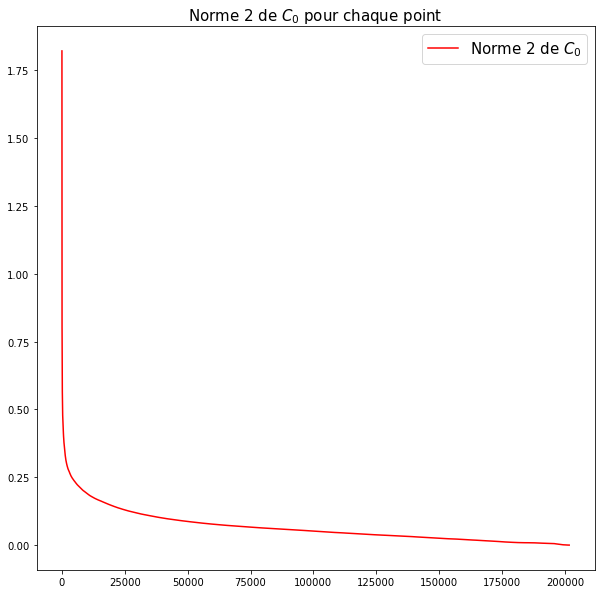

In [79]:
rpca.plot_normC()

In [10]:
weird=rpca.p_outliers(5000)

In [158]:
cible_out=np.array(cible)[list(set(range(len(cible))).difference(set(weird)))]

In [92]:
unique,counts=np.unique(cible.drop(weird,axis=0),return_counts=True)
np.asarray((unique, counts)).T

array([[     0, 195041],
       [     1,   1575]], dtype=int64)

In [96]:
tuned_parameters = [{'loss': ['deviance'],
        'max_features':[5,10,20],
        'max_depth':[5,10],
        'n_estimators':[20,50,100]}]


clf_rpca = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, scoring='roc_auc', cv=5,verbose=1)
clf_rpca.fit(dg.drop(weird,axis=0),cible.drop(weird,axis=0))

ValueError: Found input variables with inconsistent numbers of samples: [196661, 196616]

In [ ]:
print('--------------------------')
print("Best parameters set found on development set:")
print('')
print(clf_rpca.best_params_)
print('')

print("Grid scores on development set:")
print('')
means = clf_rpca.cv_results_['mean_test_score']
stds = clf_rpca.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_rpca.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print('')

In [19]:
gbt=GradientBoostingClassifier(max_depth=5,n_estimators=100,max_features=5)

In [38]:
dg_out=dg.drop(weird,axis=0)
cible=dg_out.fin
dg_out=dg_out.drop('fin',axis=1)

In [39]:
cross_val_score(gbt, dg_out, cible, cv=5,scoring='roc_auc')

array([ 0.78600974,  0.84841009,  0.85423898,  0.84292587,  0.7920167 ])